# Lab Task:

####  Model: Build and train a custom CNN with the following structure:

Conv2D(64 filters, (3×3), ReLU) → BatchNormalization → MaxPooling2D(2×2)

Conv2D(128 filters, (3×3), ReLU) → BatchNormalization → MaxPooling2D(2×2)

Conv2D(256 filters, (3×3), ReLU) → Dropout(0.3) → MaxPooling2D(2×2)

Flatten → Dense(256, ReLU) → Dropout(0.5) → Dense(1, Sigmoid)

#### Dataset: Use only two classes:

from the last lab tasks

#### Compile with: binary_crossentropy loss and adam optimizer.

#### Train and evaluate the model.

In [2]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns

In [3]:
checkpoints = r'D:\anaconda\envs\lab12\E1-cp-{epoch:04d}-loss{val_loss:.2f}.h5'

In [4]:
train_dir = r'D:\anaconda\envs\lab11\computer vision\train'
validation_dir = r'D:\anaconda\envs\lab11\computer vision\validation'
test_dir = r'D:\anaconda\envs\lab11\computer vision\test'

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4,activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [7]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(256, 256), batch_size=32,class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(256, 256),batch_size=32,class_mode='categorical')

Found 1600 images belonging to 4 classes.
Found 252 images belonging to 4 classes.


In [9]:
EpochCheckpoint = ModelCheckpoint(checkpoints,
                             monitor="val_loss",
                             save_best_only=True, 
                             verbose=1)
callbacks = [EpochCheckpoint]

In [10]:
step_size_train = train_generator.n//train_generator.batch_size

model_history = model.fit(train_generator,
                    validation_data =validation_generator,
                   steps_per_epoch=step_size_train,
                   epochs=4,
                    callbacks=callbacks)

Epoch 1/4
50/50 [==============================] - ETA: 0s - loss: 1.0728 - acc: 0.4631
Epoch 1: val_loss improved from inf to 0.92175, saving model to D:\anaconda\envs\lab12\E1-cp-0001-loss0.92.h5
50/50 [==============================] - 110s 2s/step - loss: 1.0728 - acc: 0.4631 - val_loss: 0.9217 - val_acc: 0.4960
Epoch 2/4
50/50 [==============================] - ETA: 0s - loss: 0.8774 - acc: 0.6244
Epoch 2: val_loss improved from 0.92175 to 0.58068, saving model to D:\anaconda\envs\lab12\E1-cp-0002-loss0.58.h5
50/50 [==============================] - 96s 2s/step - loss: 0.8774 - acc: 0.6244 - val_loss: 0.5807 - val_acc: 0.7381
Epoch 3/4
50/50 [==============================] - ETA: 0s - loss: 0.5745 - acc: 0.7600
Epoch 3: val_loss improved from 0.58068 to 0.46560, saving model to D:\anaconda\envs\lab12\E1-cp-0003-loss0.47.h5
50/50 [==============================] - 97s 2s/step - loss: 0.5745 - acc: 0.7600 - val_loss: 0.4656 - val_acc: 0.7659
Epoch 4/4
50/50 [=======================

In [13]:
model_history.history

{'loss': [1.0728434324264526,
  0.8773585557937622,
  0.5745123624801636,
  0.4942823052406311],
 'acc': [0.46312499046325684,
  0.6243749856948853,
  0.7599999904632568,
  0.7887499928474426],
 'val_loss': [0.921745777130127,
  0.5806828737258911,
  0.4656030237674713,
  0.9832118153572083],
 'val_acc': [0.4960317313671112,
  0.738095223903656,
  0.7658730149269104,
  0.5992063283920288]}

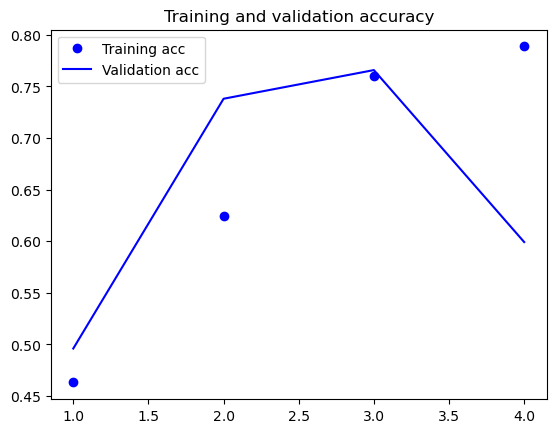

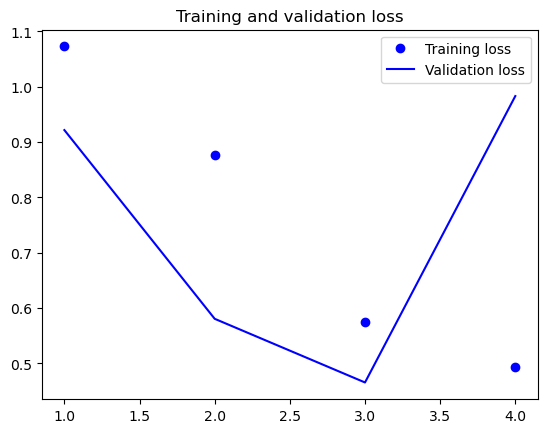

<Figure size 640x480 with 0 Axes>

In [18]:
acc = model_history.history['acc']
val_acc = model_history.history['val_acc']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
plt.savefig(r'D:\anaconda\envs\lab12\computer vision\model_Accuracy.png')

In [19]:
model.save(r'D:\anaconda\envs\lab12\computer vision\E1-cp-0012-loss0.21.h5')

Found 200 images belonging to 4 classes.
7/7 [==============================] - 2s 310ms/step


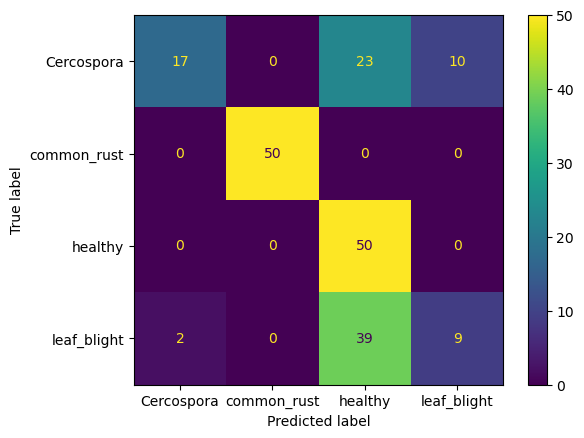

In [20]:
#model = load_model(r'C:\Users\Administrator\Downloads\ML Lab\Computer vision\lab11\model_lab11.h5')
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(256, 256), batch_size=32, shuffle=False, class_mode='categorical')
label=test_generator.labels
preds=model.predict(test_generator)
pred = np.argmax(preds, axis = 1)
cm = confusion_matrix(label, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels=['Cercospora', 'common_rust','healthy', 'leaf_blight'])
disp.plot()
plt.show()
#plt.savefig(r'C:\Users\Administrator\Downloads\ML Lab\Computer vision\lab11\confusion_matrics.jpg')

In [21]:
print(classification_report(label, pred, target_names=['Cercospora', 'common_rust','healthy', 'leaf_blight']))

              precision    recall  f1-score   support

  Cercospora       0.89      0.34      0.49        50
 common_rust       1.00      1.00      1.00        50
     healthy       0.45      1.00      0.62        50
 leaf_blight       0.47      0.18      0.26        50

    accuracy                           0.63       200
   macro avg       0.70      0.63      0.59       200
weighted avg       0.70      0.63      0.59       200

